In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({
    'figure.figsize': (20, 10),
    'axes.grid': True,
    'font.size': 15,
})

In [2]:
data = pd.read_csv('faithful.csv', delim_whitespace=True)
del data['i']
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


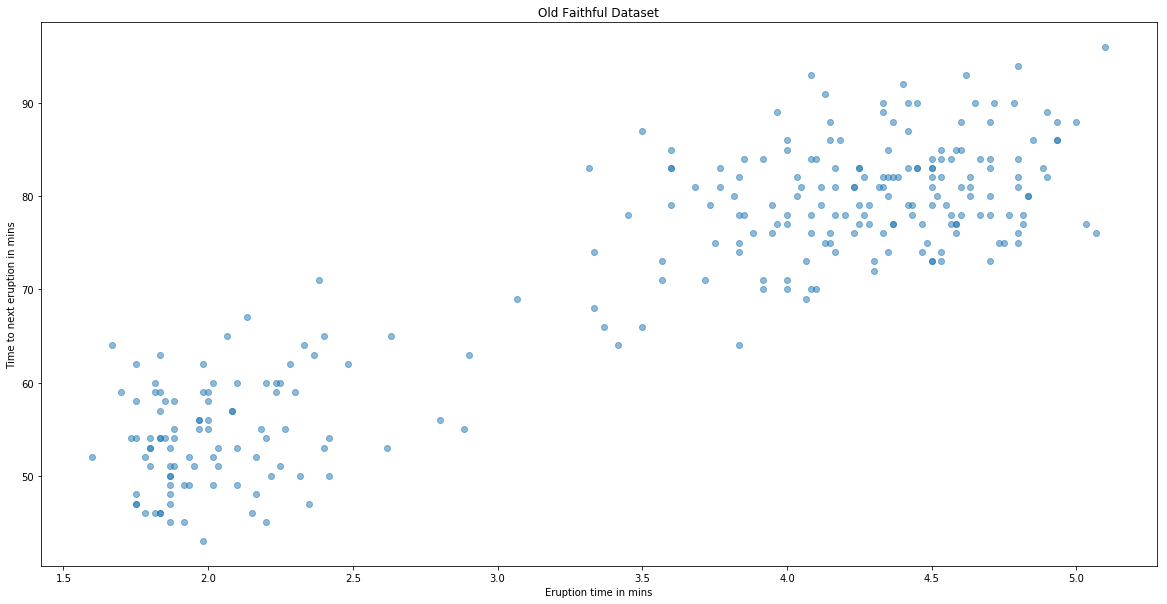

In [3]:
plt.figure(1)
plt.scatter(data['eruptions'], data['waiting'], marker='o', alpha=0.5)
plt.xlabel('Eruption time in mins')
plt.ylabel('Time to next eruption in mins')
plt.title('Old Faithful Dataset')
plt.show()

In [4]:
ndata = (data - data.min()) / (data.max() - data.min())
ndata.head()

,eruptions,waiting
0,0.571429,0.679245
1,0.057143,0.207547
2,0.495143,0.584906
3,0.195143,0.358491
4,0.838000,0.792453


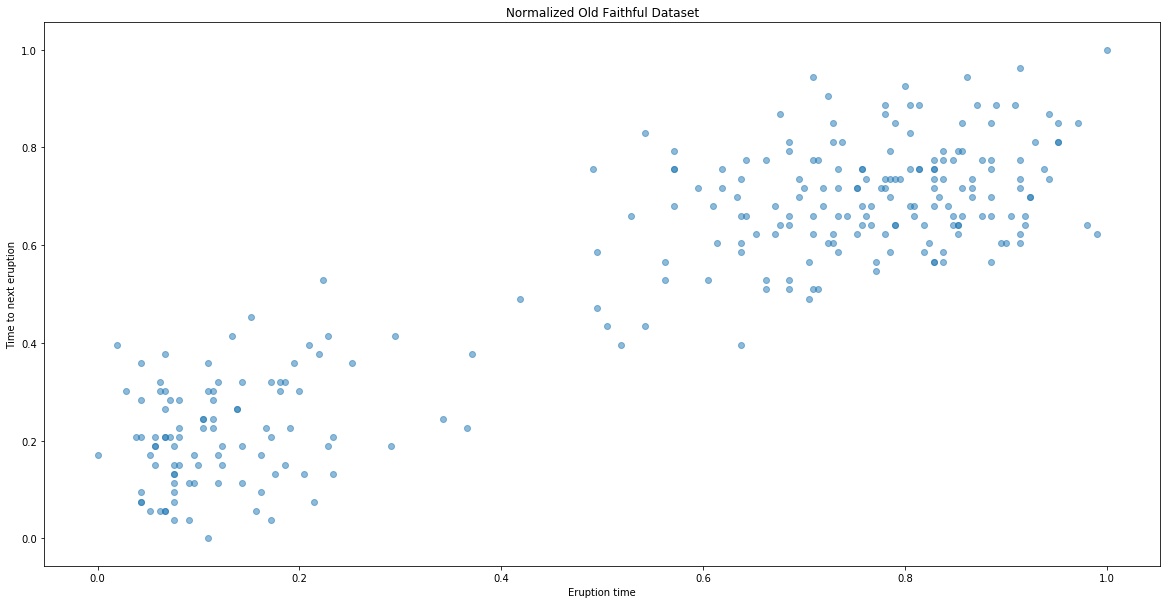

In [5]:
plt.figure(1)
plt.scatter(ndata['eruptions'], ndata['waiting'], marker='o', alpha=0.5)
plt.xlabel('Eruption time')
plt.ylabel('Time to next eruption')
plt.title('Normalized Old Faithful Dataset')
plt.show()

In [6]:
def kmeans(k, data):
    m = np.random.uniform(0, 1, (k, 2))
    m_prev = np.zeros(m.shape)
    labels = np.zeros(data.shape[0])
    
    dist = np.linalg.norm(m - m_prev, None)
    
    while dist > 0:
        labels = np.apply_along_axis(lambda x: np.argmin(np.linalg.norm(np.array(x) - m, axis=1)), 1, np.array(ndata))
        
        m_prev = m.copy()
        
        for i in range(k):
            p = [data.iloc[j] for j in range(data.shape[0]) if labels[j] == i]
            
            if len(p) > 0:
                m[i] = np.mean(p, axis=0)
        
        dist = np.linalg.norm(m - m_prev, None)
    
    return labels, m

In [7]:
def plot_kmeans(k, data):
    labels, centers = kmeans(k, data)
    colors = ['y', 'b', 'g', 'r', 'c', 'm']
    plt.figure(1)

    for i in range(k):
        p = np.array([data.iloc[j] for j in range(ndata.shape[0]) if labels[j] == i])

        if len(p) > 0:
            plt.gca().scatter(p[:, 0], p[:, 1], marker='o', alpha=0.5, c=colors[i])

    plt.gca().scatter(centers[:, 0], centers[:, 1], marker='o', alpha=0.5, s=150, c='k')
    plt.xlabel('Eruption time')
    plt.ylabel('Time to next eruption')
    plt.title('Clustered, normalized Old Faithful Dataset')
    plt.show()

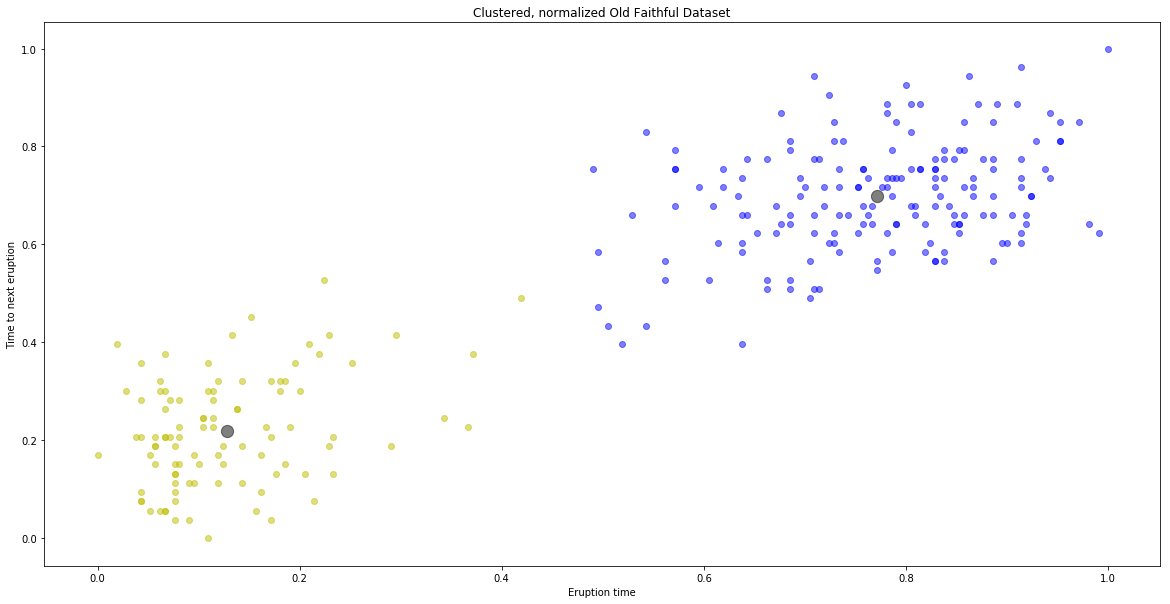

In [8]:
plot_kmeans(2, ndata)

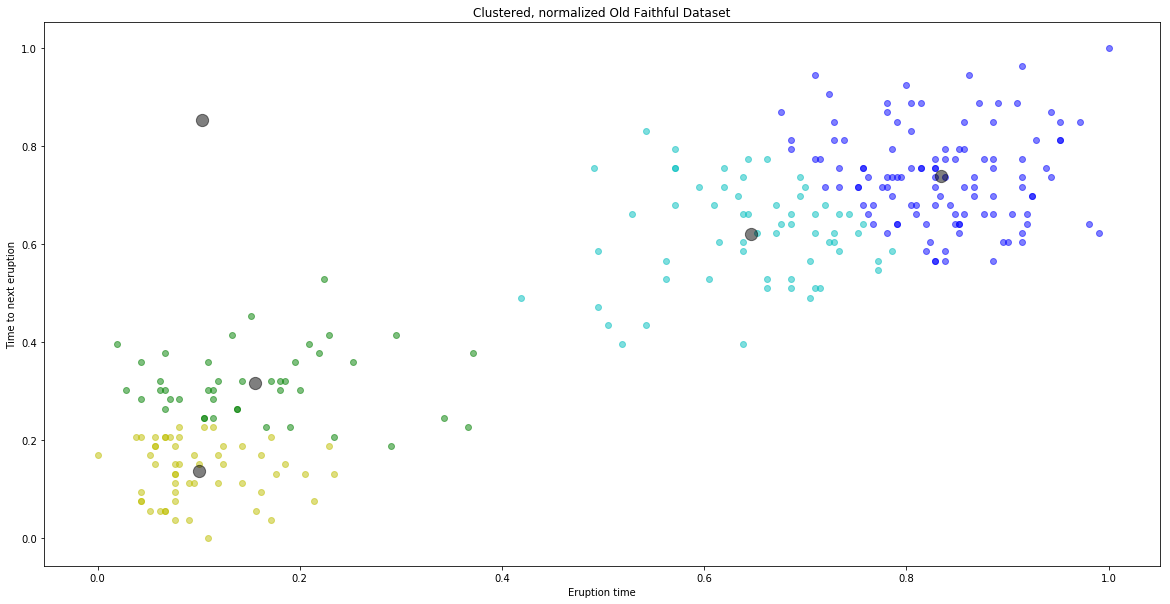

In [9]:
plot_kmeans(5, ndata)